<a href="https://colab.research.google.com/github/MaengJoonYoung/Section1_Poject/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('vgames2.csv')
df.dtypes
df = df.drop(['Unnamed: 0'], axis=1)
df.dropna(inplace =True)
# sales 단위 통일
repl_dict = {'[kK]': '/1e3', '[mM]': ''}
df['NA_Sales'] = df['NA_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df.loc[10,:]

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                        0
Other_Sales                  0.06
Name: 10, dtype: object

In [ ]:
# year 데이터 이상치 수정

list_year = []

for a in df['Year']:
  if a >=0 and a <=21:
    a = 2000 + a
  elif a >=22 and a <= 99:
    a = 1900 + a
  else :
    a = a
  list_year.append(a)
df['Year'] = list_year
df.loc[81, :]

Name           Treasures of the Deep
Platform                          PS
Year                            1997
Genre                         Action
Publisher         Namco Bandai Games
NA_Sales                         0.1
EU_Sales                        0.07
JP_Sales                           0
Other_Sales                     0.01
Name: 81, dtype: object

In [ ]:
# Total_sales라는 feature 추가
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] +df['Other_Sales']

In [ ]:
# 장르와 지역간의 연관성이 있는지 확인하는 chi-test
from scipy.stats import chi2_contingency
df_na = df[['Genre', 'NA_Sales']].astype('category')
df_na = pd.crosstab(index = df_na['Genre'], columns = df_na['NA_Sales'])

df_eu = df[['Genre', 'EU_Sales']].astype('category')
df_eu = pd.crosstab(index = df_eu['Genre'], columns = df_eu['EU_Sales'])

df_jp = df[['Genre', 'JP_Sales']].astype('category')
df_jp = pd.crosstab(index = df_jp['Genre'], columns = df_jp['JP_Sales'])

df_oth = df[['Genre', 'Other_Sales']].astype('category')
df_oth = pd.crosstab(index = df_oth['Genre'], columns = df_oth['Other_Sales'])

print('NA',chi2_contingency(df_na)[1])
print('EU',chi2_contingency(df_eu)[1])
print('JP',chi2_contingency(df_jp)[1])
print('Other',chi2_contingency(df_oth)[1])
# 모든 지역에서 pvalue 값이 0.05 보다 작아 장르와 출고량간의 연관이 있다고 볼 수 있다. 즉 ,선호하는 장르가 있다고 볼 수 있다.

NA 5.923660629019466e-63
EU 3.0738581086137684e-38
JP 5.0137376205319465e-171
Other 1.73126439723736e-19


In [ ]:
df_genre = df.groupby(['Genre']).sum()
df_genre.reset_index(inplace = True)
df_genre.drop(['Year'], axis=1 , inplace =True)
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
1,Adventure,101.79,63.66,51.87,16.70,234.02
2,Fighting,220.35,99.90,87.14,36.15,443.54
3,Misc,394.73,208.15,104.18,72.64,779.70
4,Platform,445.38,200.63,130.53,51.45,827.99
5,Puzzle,121.58,50.47,56.24,12.44,240.73
6,Racing,354.70,235.02,56.32,76.51,722.55
7,Role-Playing,318.76,183.09,342.93,56.73,901.51
8,Shooter,574.48,310.23,38.18,101.86,1024.75
9,Simulation,181.43,112.99,63.54,31.32,389.28


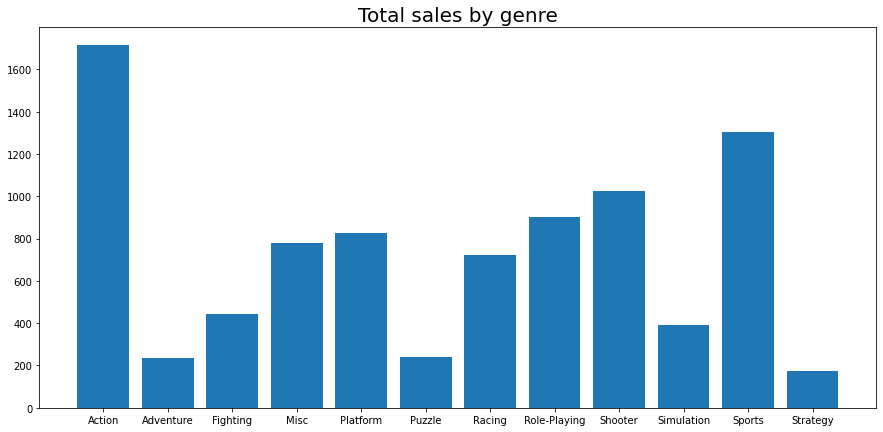

In [ ]:
# 장르별 출고량 비교 (합계)
plt.figure(figsize=(15,7))
plt.bar(x = df_genre['Genre'], height = df_genre['Total_Sales'])
plt.title('Total sales by genre', fontsize = 20)
plt.show()

# 출고량 순위 1. Action 2. Sports, 3. Shooter, 4. Role-playing 5. Platform

In [ ]:
# 가장 늦게 출시한 연도와 최근 출시 연도 확인
df_sort_year = df.sort_values(by = ['Year'])
df_sort_year.tail() # 1980 ~ 2020

bins = [1980.0, 1985.0, 1990.0, 1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2020.0]
labels = [1980,1985, 1990, 1995,2000, 2005, 2010, 2015]
df['binned'] = pd.cut(df['Year'], bins = bins, labels = labels)

In [ ]:
df_trend = df.groupby(by = ['binned', 'Genre']).sum()
df_trend.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],axis = 1, inplace = True)
df_trend.reset_index(inplace=True)

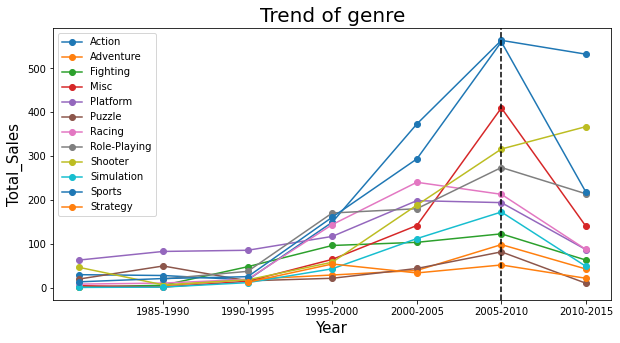

In [ ]:
df_trend2 = pd.pivot_table(df_trend, values = 'Total_Sales', index = 'binned', columns = 'Genre')
df_trend2.reset_index(inplace=True)
df_trend2.drop(7,inplace = True)
genre = ['Action', 'Adventure', 'Fighting','Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy']
plt.figure(figsize = (10,5))
for a in genre:
  plt.plot(df_trend2[a], 'o-', label = a)
plt.xticks([1,2,3,4,5,6], labels = ['1985-1990','1990-1995','1995-2000', '2000-2005','2005-2010', '2010-2015'])
plt.axvline(x=5, ymin=0, ymax= 35 , ls = '--', color ='black')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total_Sales', fontsize = 15)
plt.title('Trend of genre', fontsize = 20)
plt.legend()
plt.show()
# 2000년도에는 'Action', 'Sports', 'Racing' 순으로 인기가 있었다고 볼 수 있고, 2005년도에 'Action', 'Sports', 'Misc', 'Shooter' 등의 게임이 급격히 증가한 것을 볼 수 있다.
# 하지만 2010년이 지나고 나서는 대부분의 게임이 그 전에 비해 출고량이 급격히 떨어지고 있다 하지만, 'Action'의 경우 다른 장르에 비해 많은 감소를 보이지 않았고 
# 'Shooter'의 경우 지속적으로 출고량이 증가하는 걸 볼 수 있다.

In [ ]:
# 총 출고량이 높은 게임 정렬.

df_sales = df.sort_values(by = ['Total_Sales'], ascending =False)
df_sales.reset_index(inplace=True)
df_sales.drop(['index'], axis=1, inplace=True)
df_top50 = df_sales.head(50)
df_top500 = df_sales.head(500)

In [ ]:
df_top50['Publisher'].value_counts()
top50 = ['Nintendo', 'Activision', 'Take-Two Interactive','Microsoft Game Studios','Sony Computer Entertainment']

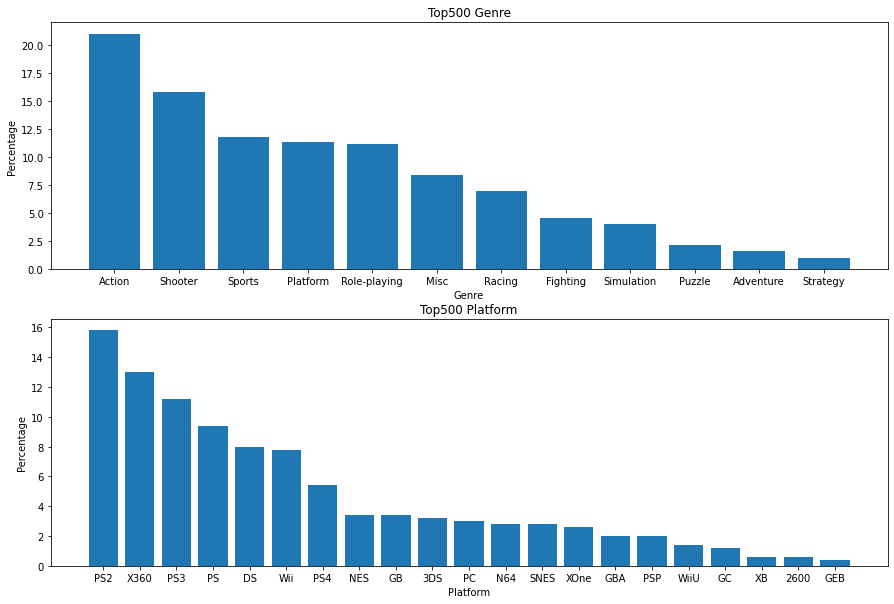

In [ ]:
df_top500['Genre'].value_counts()
top_gen = ['Action', 'Shooter', 'Sports', 'Platform', 'Role-playing', 'Misc', 'Racing','Fighting', 'Simulation', 'Puzzle','Adventure','Strategy']

df_top500['Platform'].value_counts()
top500_platform = ['PS2', 'X360','PS3','PS', 'DS', 'Wii', 'PS4', 'NES', 'GB','3DS', 'PC', 'N64', 'SNES', 'XOne', 'GBA', 'PSP', 'WiiU','GC','XB','2600','GEB']

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.bar(x=top_gen ,height = (df_top500['Genre'].value_counts()/500) * 100)
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.title('Top500 Genre')

plt.subplot(2,1,2)
plt.bar(x=top500_platform ,height = (df_top500['Platform'].value_counts()/500) * 100)
plt.title('Top500 Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.show()
# 출고량이 높은 게임은 주로 플랫폼으로 콘솔을 이용하는 경우가 대부분이었고, 장르의 경우 'Action', 'Shooter', 'Sports', 'Platform', 'Role-playing' 순이었다.

In [ ]:
# 스포츠 장르 확인
import numpy as np
df_sports = df[(df['Genre'] == 'Sports')]
df_sports.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
df_fifa = df_sports[(df_sports['Name'].str.contains('FIFA'))]
df_wii = df_sports[(df_sports['Name'].str.contains('Wii'))]
fifa = (np.sum(df_fifa['Total_Sales']) /1305.34) * 100
wii = (np.sum(df_fifa['Total_Sales']) /1305.34) * 100 
sports = wii # 23% 차지 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_action = df[(df['Genre'] == 'Action')]
df_action.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
df_action50=df_action.head(50)
df_action50
df_thef = df_action[(df_action['Name'].str.contains('Theft'))]
df_zel = df_action[(df_action['Name'].str.contains('Zelda'))]
thef = (np.sum(df_thef['Total_Sales'])/1712.98)*100 #Theft가 9%
zelda = (np.sum(df_zel['Total_Sales'])/1712.98)*100
action = thef

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#1024.75
df_sho = df[(df['Genre'] == 'Shooter')]
df_sho.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
df_sho.head(50)
df_call_of = df_sho[(df_sho['Name'].str.contains('Call of Duty'))]
shooter = (np.sum(df_call_of['Total_Sales']) /1024.75) * 100
#call of duty 가 23%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#827.99 plat form total salese
import numpy as np
df_platf = df[(df['Genre'] == 'Platform')]
df_mario = df_platf[(df_platf['Name'].str.contains('Mario'))]
mario25 = np.sum(df_mario['Total_Sales'])
mario25
platform =(mario25 / 827.99) * 100
# 마리오 게임이 전체 플랫폼 출고량의 약 36% 차지하고 있다.

In [ ]:
df_role = df[(df['Genre'] == 'Role-Playing')]
df_role.sort_values(by = 'Total_Sales', ascending = False, inplace = True)
#df_role.head(50)
df_Pokemon = df_role[(df_role['Name'].str.contains('Pokemon'))]
role_playing =(np.sum(df_Pokemon['Total_Sales'])/901.51)*100 #포켓몬 게임이 롤플레잉 비중 17% 차지

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_action.value_counts('Platform')
(369+344+153+121)/len(df_action)
# 액션 게임 중 플레이스테이션 플랫폼이 30%의 비중을 차지한다.
df_action100 = df_action.head(100)
df_action100.value_counts('Platform')
(18+17+15+8)/len(df_action100) # 상위 100개의 게임에서는 58%가 플레이스테이션 사용
df_action500 = df_action.head(500)
df_action500.value_counts('Platform')
(96+76+37+24)/500 # 상위 500개 게임에서는 46.6%

0.466

In [ ]:
df_subset = df.groupby(by = ['Genre', 'Platform']).sum()
df_subset.reset_index(inplace=True)
df_subset.sort_values(by='Total_Sales', ascending=False, inplace = True)
df_subset.head(50)
df_subset2 = df_subset[(df_subset['Genre'] == 'Action')]
df_subset2 = df_subset2.groupby(by= 'Platform').sum()
df_subset2.sort_values(by='Total_Sales', ascending=False, inplace = True)

In [ ]:
(301.49+269.68+125.59+84.70)/np.sum(df_subset2['Total_Sales']) #액션게임 전체 매출 중 45%가 플레이스테이션을 통한 매출.

# **발표를 위해 순서를 수정한것들 입니다..!**

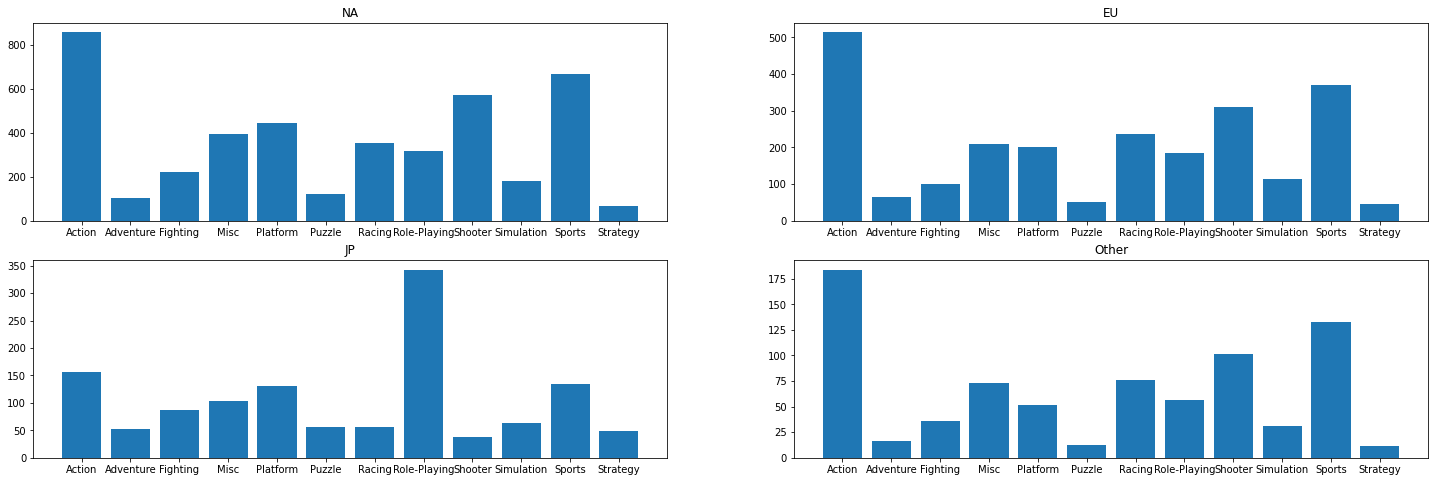

In [ ]:
import matplotlib.pyplot as plt

# 지역별 출고량 비교 (합계)
plt.figure(figsize=(25,8))

plt.subplot(2,2,1)
plt.bar(x= df_genre['Genre'], height = df_genre['NA_Sales'])
plt.title('NA')

plt.subplot(2,2,2)
plt.bar(x= df_genre['Genre'], height = df_genre['EU_Sales'])
plt.title('EU')

plt.subplot(2,2,3)
plt.bar(x= df_genre['Genre'], height = df_genre['JP_Sales'])
plt.title('JP')

plt.subplot(2,2,4)
plt.bar(x= df_genre['Genre'], height = df_genre['Other_Sales'])
plt.title('Other')

plt.show()

# 그래프를 보면 북미지역, 유럽지역과 타지역은 Action, Sports, Shooter 게임에 선호도가 높은 것을 볼 수 있다.
# 반면 일본지역은 Role-Playing 게임에 선호도가 높은 것을 볼 수 있다.

In [ ]:
# 장르와 Total_Sales, 장르와 플랫폼간의 연관이 있는지 확인
from scipy.stats import chi2_contingency

df_sub = df[['Genre', 'Platform', 'Publisher','Total_Sales']].astype('category')

gen_sales = pd.crosstab(df['Genre'], df['Total_Sales'])
gen_plat = pd.crosstab(df['Genre'], df['Platform'])


print('gen-sales',chi2_contingency(gen_sales)[1])
print('gen-plat',chi2_contingency(gen_plat)[1])

gen-sales 5.4560699922727875e-06
gen-plat 0.0


In [ ]:
# 장르와 지역간의 연관성이 있는지 확인하는 chi-test
from scipy.stats import chi2_contingency
df_na = df[['Genre', 'NA_Sales']].astype('category')
df_na = pd.crosstab(index = df_na['Genre'], columns = df_na['NA_Sales'])

df_eu = df[['Genre', 'EU_Sales']].astype('category')
df_eu = pd.crosstab(index = df_eu['Genre'], columns = df_eu['EU_Sales'])

df_jp = df[['Genre', 'JP_Sales']].astype('category')
df_jp = pd.crosstab(index = df_jp['Genre'], columns = df_jp['JP_Sales'])

df_oth = df[['Genre', 'Other_Sales']].astype('category')
df_oth = pd.crosstab(index = df_oth['Genre'], columns = df_oth['Other_Sales'])

print('NA',chi2_contingency(df_na)[1])
print('EU',chi2_contingency(df_eu)[1])
print('JP',chi2_contingency(df_jp)[1])
print('Other',chi2_contingency(df_oth)[1])
# 모든 지역에서 pvalue 값이 0.05 보다 작아 장르와 출고량간의 연관이 있다고 볼 수 있다. 즉 ,선호하는 장르가 있다고 볼 수 있다.

NA 5.923660629019466e-63
EU 3.0738581086137684e-38
JP 5.0137376205319465e-171
Other 1.73126439723736e-19


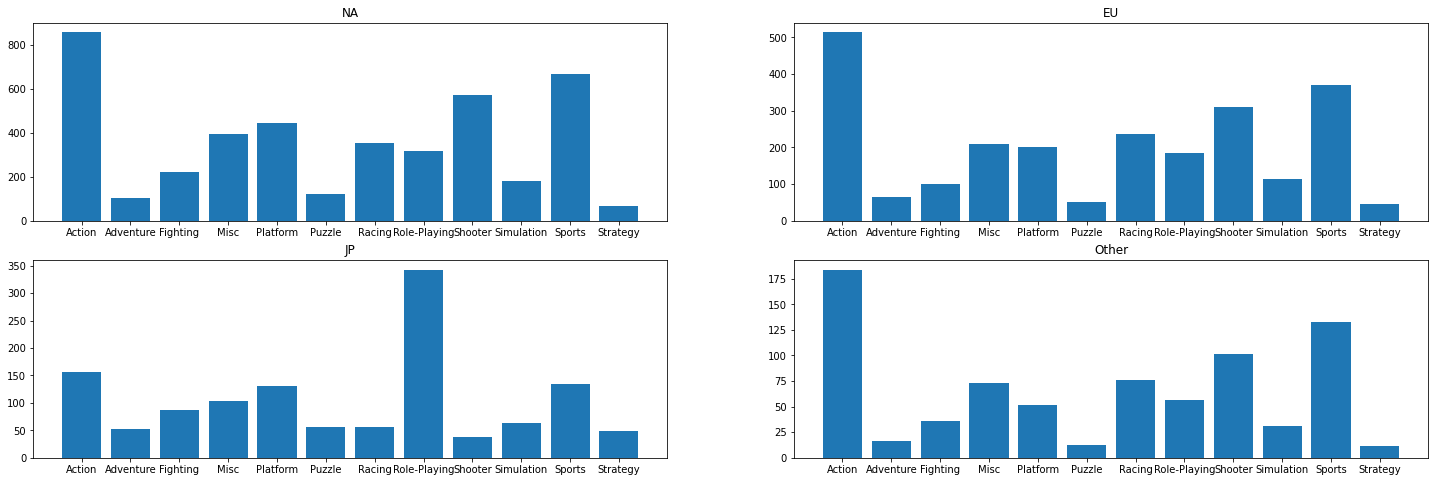

In [ ]:
import matplotlib.pyplot as plt

# 지역별 출고량 비교 (합계)
plt.figure(figsize=(25,8))

plt.subplot(2,2,1)
plt.bar(x= df_genre['Genre'], height = df_genre['NA_Sales'])
plt.title('NA')

plt.subplot(2,2,2)
plt.bar(x= df_genre['Genre'], height = df_genre['EU_Sales'])
plt.title('EU')

plt.subplot(2,2,3)
plt.bar(x= df_genre['Genre'], height = df_genre['JP_Sales'])
plt.title('JP')

plt.subplot(2,2,4)
plt.bar(x= df_genre['Genre'], height = df_genre['Other_Sales'])
plt.title('Other')

plt.show()

# 그래프를 보면 북미지역, 유럽지역과 타지역은 Action, Sports, Shooter 게임에 선호도가 높은 것을 볼 수 있다.
# 반면 일본지역은 Role-Playing 게임에 선호도가 높은 것을 볼 수 있다.

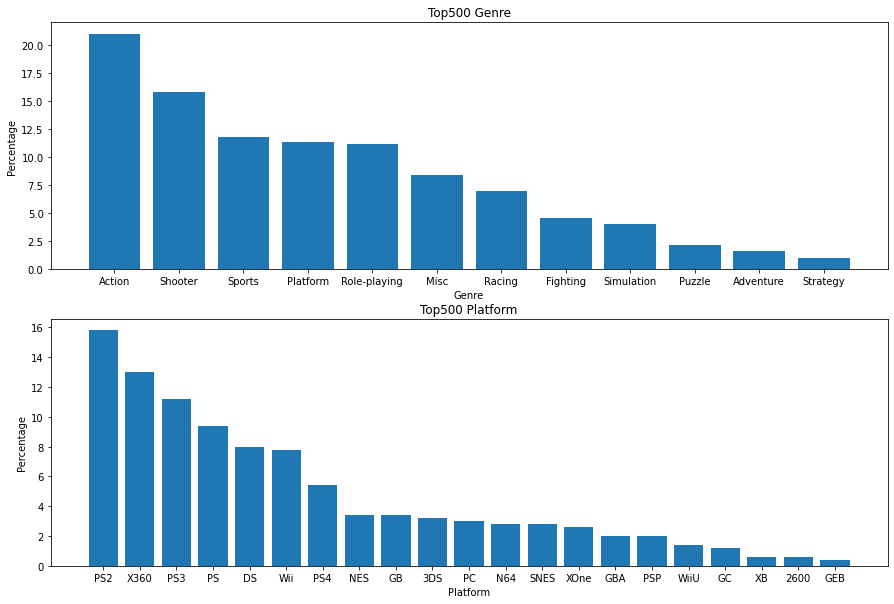

In [ ]:
df_top500['Genre'].value_counts()
top_gen = ['Action', 'Shooter', 'Sports', 'Platform', 'Role-playing', 'Misc', 'Racing','Fighting', 'Simulation', 'Puzzle','Adventure','Strategy']

df_top500['Platform'].value_counts()
top500_platform = ['PS2', 'X360','PS3','PS', 'DS', 'Wii', 'PS4', 'NES', 'GB','3DS', 'PC', 'N64', 'SNES', 'XOne', 'GBA', 'PSP', 'WiiU','GC','XB','2600','GEB']

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.bar(x=top_gen ,height = (df_top500['Genre'].value_counts()/500) * 100)
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.title('Top500 Genre')

plt.subplot(2,1,2)
plt.bar(x=top500_platform ,height = (df_top500['Platform'].value_counts()/500) * 100)
plt.title('Top500 Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.show()
# 출고량이 높은 게임은 주로 플랫폼으로 콘솔을 이용하는 경우가 대부분이었고, 장르의 경우 'Action', 'Shooter', 'Sports', 'Platform', 'Role-playing' 순이었다.

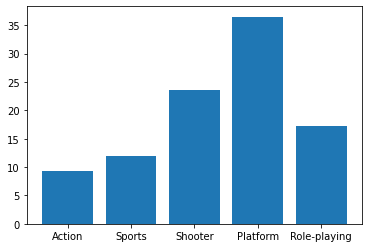

In [ ]:
y = [action, sports, shooter, platform, role_playing]
plt.bar(x = ['Action','Sports','Shooter','Platform','Role-playing'], height = y)
plt.show()

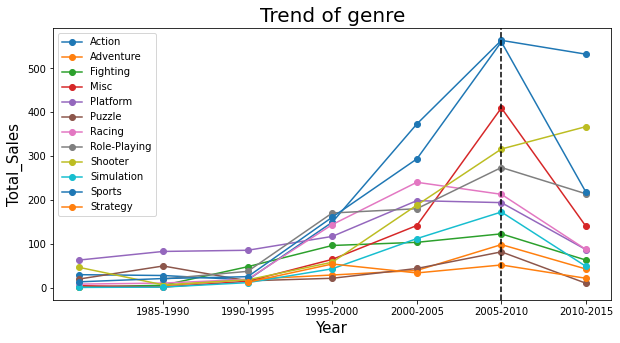

In [ ]:
df_trend2 = pd.pivot_table(df_trend, values = 'Total_Sales', index = 'binned', columns = 'Genre')
df_trend2.reset_index(inplace=True)
df_trend2.drop(7,inplace = True)
genre = ['Action', 'Adventure', 'Fighting','Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy']
plt.figure(figsize = (10,5))
for a in genre:
  plt.plot(df_trend2[a], 'o-', label = a)
plt.xticks([1,2,3,4,5,6], labels = ['1985-1990','1990-1995','1995-2000', '2000-2005','2005-2010', '2010-2015'])
plt.axvline(x=5, ymin=0, ymax= 35 , ls = '--', color ='black')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total_Sales', fontsize = 15)
plt.title('Trend of genre', fontsize = 20)
plt.legend()
plt.show()
# 2000년도에는 'Action', 'Sports', 'Racing' 순으로 인기가 있었다고 볼 수 있고, 2005년도에 'Action', 'Sports', 'Misc', 'Shooter' 등의 게임이 급격히 증가한 것을 볼 수 있다.
# 하지만 2010년이 지나고 나서는 대부분의 게임이 그 전에 비해 출고량이 급격히 떨어지고 있다 하지만, 'Action'의 경우 다른 장르에 비해 많은 감소를 보이지 않았고 
# 'Shooter'의 경우 지속적으로 출고량이 증가하는 걸 볼 수 있다.

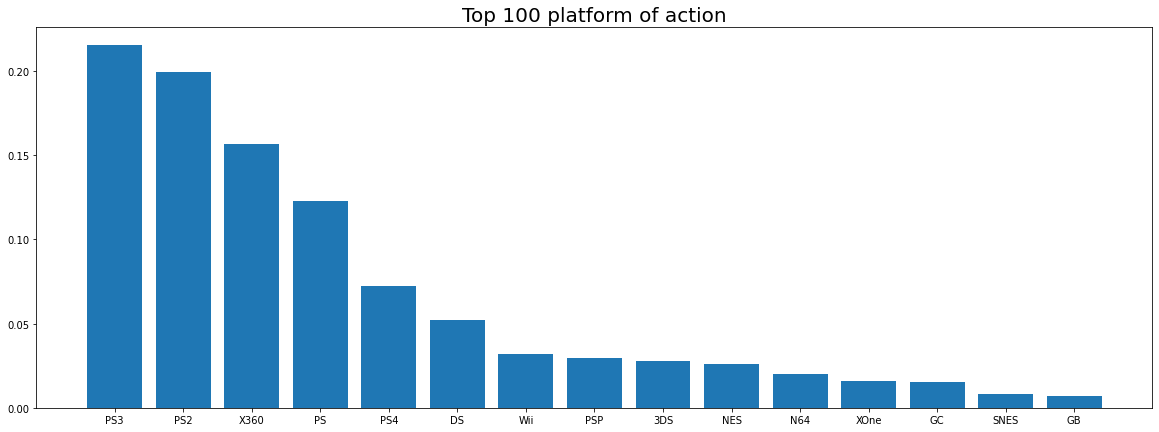

In [ ]:
df_action100 = df_action.head(100)
plat_act100 = df_action100.groupby(by = 'Platform').sum()
plat_act100.reset_index(inplace = True)
plat_act100.sort_values(by = 'Total_Sales', ascending = False, inplace = True)

df_action_low100 = df_action.tail(100)
plat_low_act100 = df_action_low100.groupby(by = 'Platform').sum()
plat_low_act100.reset_index(inplace = True)
plat_low_act100.sort_values(by = 'Total_Sales', ascending = False, inplace = True)

plt.figure(figsize= (20,7))
plt.bar(x = plat_act100['Platform'], height = plat_act100['Total_Sales']/np.sum(plat_act100['Total_Sales']))
plt.title('Top 100 platform of action', fontsize = 20)
plt.show()